### Removing Outliers
<hr style="border-top: 2px dashed #999;">



#### Box Plot

Use when you want to see outliers quickly for a single column.

Good for one variable (ex: BMI, glucose, s5).

Shows outliers visually as dots.

Very useful in EDA (Exploratory Data Analysis).

Helps you spot extreme values without thinking about formulas.

👉 Use boxplot when:

You want a quick snapshot.

You are checking one column at a time.

You want visual confirmation of what looks abnorma

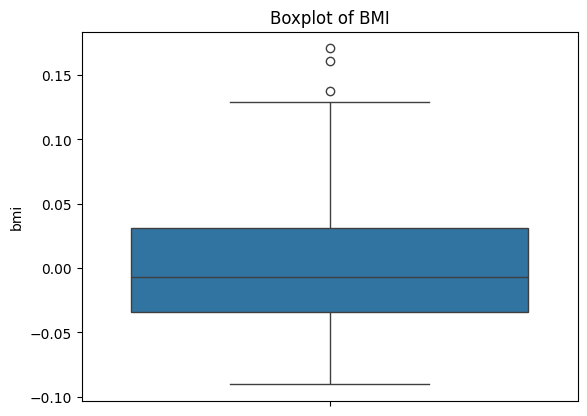

In [1]:
import sklearn
from sklearn.datasets import load_diabetes
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

diabetes = load_diabetes()

column_name = diabetes.feature_names
df_diabetics = pd.DataFrame(diabetes.data, columns=column_name)

sns.boxplot(df_diabetics['bmi'])
plt.title('Boxplot of BMI')
plt.show() 

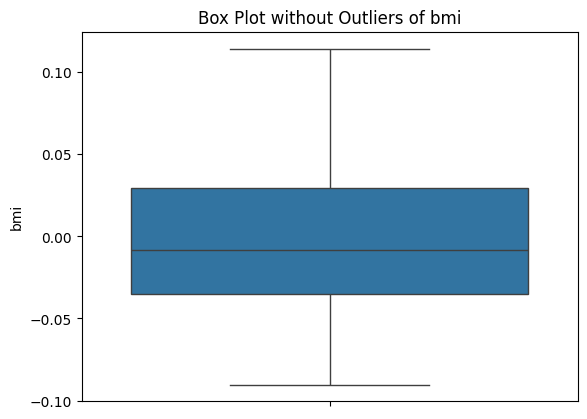

In [2]:
def removal_box_plot(df, column, threshold):
    removed_outliers = df[df[column] <= threshold]

    sns.boxplot(removed_outliers[column])
    plt.title(f'Box Plot without Outliers of {column}')
    plt.show()
    return removed_outliers


threshold_value = 0.12

no_outliers = removal_box_plot(df_diabetics, 'bmi', threshold_value)

In [3]:
# ----- BASIC UNDERSTANDING -----

# 1. See first few rows
print("\n--- HEAD ---")
print(df_diabetics.head())

# 2. See basic info
print("\n--- INFO ---")
print(df_diabetics.info())

# 3. Summary statistics for all numerical columns
print("\n--- DESCRIBE ---")
print(df_diabetics.describe().T)

# 4. Check column names
print("\n--- COLUMNS ---")
print(df_diabetics.columns)

# 5. Check for missing values
print("\n--- MISSING VALUES ---")
print(df_diabetics.isnull().sum())

# 6. Check shape (rows, columns)
print("\n--- SHAPE ---")
print(df_diabetics.shape)



# 7. View distribution of each column (optional quick check)
print("\n--- SUMMARY OF UNIQUE VALUES PER COLUMN ---")
print(df_diabetics.nunique())


--- HEAD ---
        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  
0 -0.002592  0.019907 -0.017646  
1 -0.039493 -0.068332 -0.092204  
2 -0.002592  0.002861 -0.025930  
3  0.034309  0.022688 -0.009362  
4 -0.002592 -0.031988 -0.046641  

--- INFO ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null  

### Using Scatter plot

Use when you want to see outliers in two related columns.

Good for understanding relationship between two variables
(ex: BMI vs BP, s5 vs target).

Outliers show up as points far away from the main cluster.

👉 Use scatter plot when:

You want to check how two columns relate.

You want to see if some points “do not follow the trend”.

You suspect unusual combinations (ex: high BMI but low blood pressure).

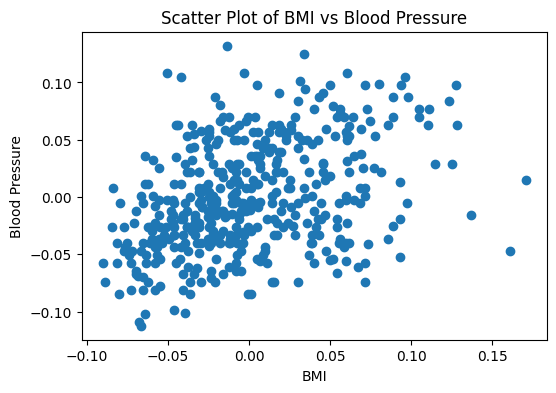

In [4]:
diabetes = load_diabetes()

column_name = diabetes.feature_names
df_diabetics = pd.DataFrame(diabetes.data, columns=column_name)

fig, ax = plt.subplots(figsize=(6, 4))
ax.scatter(df_diabetics['bmi'], df_diabetics['bp'])
ax.set_xlabel('BMI')
ax.set_ylabel('Blood Pressure')
plt.title('Scatter Plot of BMI vs Blood Pressure')
plt.show()

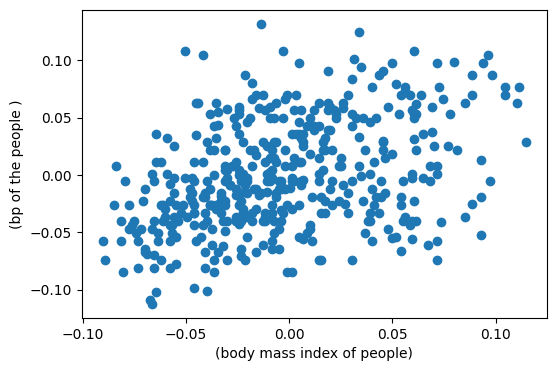

In [5]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

outlier_indices = np.where((df_diabetics['bmi'] > 0.12) & (df_diabetics['bp'] < 0.8))

no_outliers = df_diabetics.drop(outlier_indices[0])

fig, ax_no_outliers = plt.subplots(figsize=(6, 4))
ax_no_outliers.scatter(no_outliers['bmi'], no_outliers['bp'])
ax_no_outliers.set_xlabel('(body mass index of people)')
ax_no_outliers.set_ylabel('(bp of the people )')
plt.show()

#### Using Z-Score Method

Use when the data follows a normal (bell-curve) distribution.

Measures how far a point is from the mean in standard deviations.

Good for clean, well-behaved data.

Automatically marks values > 3 std dev as outliers.

👉 Use Z-score when:

Your data looks like a bell curve.

You know the values should cluster around a mean.

You want a standard statistical method.

👉 Do NOT use Z-score when:

Data is skewed.

There are many extreme values.

Data is not normally distributed

In [6]:
from scipy import stats
import numpy as np
diabetes = load_diabetes()

column_name = diabetes.feature_names
df_diabetics = pd.DataFrame(diabetes.data, columns=column_name)

z = np.abs(stats.zscore(df_diabetics['age']))
print(z)

[0.80050009 0.03956713 1.79330681 1.87244107 0.11317236 1.94881082
 0.9560041  1.33508832 0.87686984 1.49059233 2.02518057 0.57139085
 0.34228161 0.11317236 0.95323959 1.1087436  0.11593688 1.48782782
 0.80326461 0.57415536 1.03237385 1.79607132 1.79607132 0.95323959
 1.33785284 1.41422259 2.25428981 0.49778562 1.10597908 1.41145807
 1.26148309 0.49778562 0.72413034 0.6477606  0.34228161 1.02960933
 0.26591186 0.19230663 0.03956713 0.03956713 0.11317236 2.10155031
 1.26148309 0.41865135 0.95323959 0.57139085 1.18511334 1.64333183
 1.41145807 0.87963435 0.72413034 1.25871858 1.1087436  0.19230663
 1.03237385 0.87963435 0.87963435 0.57415536 0.87686984 1.33508832
 1.49059233 0.87963435 0.57415536 0.72689486 1.41145807 0.9560041
 0.19230663 0.87686984 0.80050009 0.34228161 0.03956713 0.03956713
 1.33508832 0.26591186 0.26591186 0.19230663 0.65052511 2.02518057
 0.11317236 2.17792006 1.48782782 0.26591186 0.34504612 0.80326461
 0.03680262 0.95323959 1.49059233 0.95323959 1.1087436  0.95600

In [7]:
import numpy as np

threshold_z = 2

outlier_indices = np.where(z > threshold_z)[0]
no_outliers = df_diabetics.drop(outlier_indices)
print("Original DataFrame Shape:", df_diabetics.shape)
print("DataFrame Shape after Removing Outliers:", no_outliers.shape)

Original DataFrame Shape: (442, 10)
DataFrame Shape after Removing Outliers: (426, 10)


#### Using IQR Method

Use when you want a reliable, simple, non-mathematical rule to detect outliers.

Works for any type of numeric data.

Does not assume data is normally distributed.

Very stable and heavily used in real-world data cleaning.

Same logic that boxplot uses.

👉 Use IQR method when:

You want to detect outliers programmatically.

Your data is not normal or is skewed (common in real data).

You want a safe, widely-used method.

In [8]:
diabetes = load_diabetes()

column_name = diabetes.feature_names
df_diabetics = pd.DataFrame(diabetes.data, columns=column_name)

Q1 = np.percentile(df_diabetics['bmi'], 25, method='midpoint')
Q3 = np.percentile(df_diabetics['bmi'], 75, method='midpoint')
IQR = Q3 - Q1
print(IQR)

0.06520763046978838


In [9]:
upper = Q3+1.5*IQR
upper_array = np.array(df_diabetics['bmi'] >= upper)
print("Upper Bound:", upper)
print(upper_array.sum())

lower = Q1-1.5*IQR
lower_array = np.array(df_diabetics['bmi'] <= lower)
print("Lower Bound:", lower)
print(lower_array.sum())

Upper Bound: 0.12879000811776306
3
Lower Bound: -0.13204051376139045
0


In [10]:
import sklearn
from sklearn.datasets import load_diabetes
import pandas as pd
diabetes = load_diabetes()

column_name = diabetes.feature_names
df_diabetes = pd.DataFrame(diabetes.data)
df_diabetes .columns = column_name
df_diabetes .head()
print("Old Shape: ", df_diabetes.shape)


Q1 = df_diabetes['bmi'].quantile(0.25)
Q3 = df_diabetes['bmi'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR

upper_array = np.where(df_diabetes['bmi'] >= upper)[0]
lower_array = np.where(df_diabetes['bmi'] <= lower)[0]

df_diabetes.drop(index=upper_array, inplace=True)
df_diabetes.drop(index=lower_array, inplace=True)

print("New Shape: ", df_diabetes.shape)

Old Shape:  (442, 10)
New Shape:  (439, 10)
